In [1]:
# Import the libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [2]:
# Read dataset
bank_dataset_17 = pd.read_csv("/content/drive/MyDrive/Data Mining Project - 64CS2/bank-full.csv")
bank_dataset_17

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Data Visualization

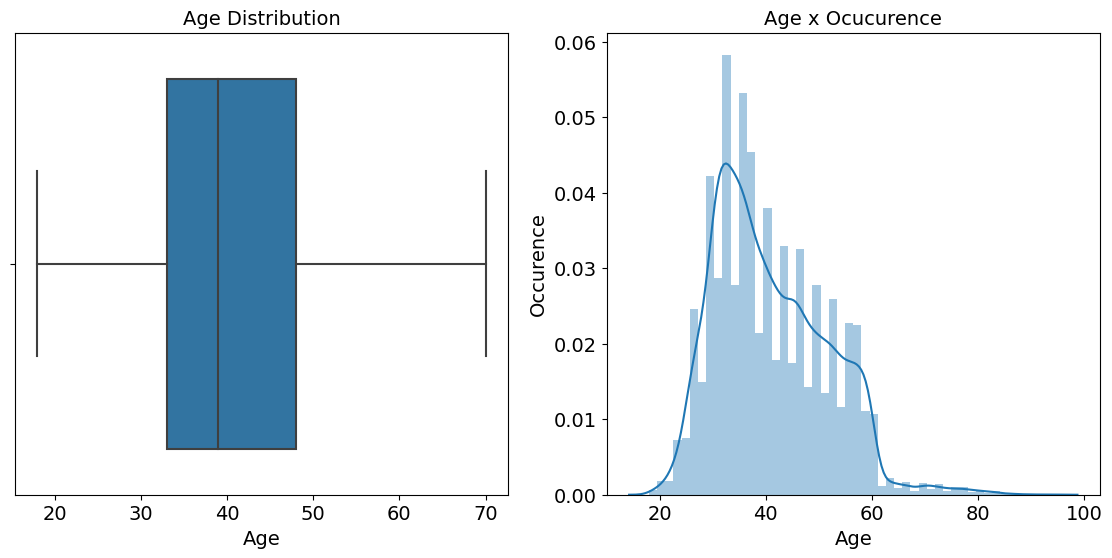

In [26]:
# Age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (14, 6))

sns.boxplot(x = bank_dataset_17["age"], ax = ax1, showfliers = False)
ax1.set_xlabel("Age", fontsize = 14)
ax1.set_title("Age Distribution", fontsize = 14)
ax1.tick_params(labelsize = 14)

sns.distplot(x = bank_dataset_17["age"], ax = ax2)
ax2.set_xlabel('Age', fontsize = 14)
ax2.set_ylabel('Occurence', fontsize = 14)
ax2.set_title('Age x Ocucurence', fontsize = 14)
ax2.tick_params(labelsize = 14)
plt.show()

Text(0.5, 1.0, 'Job for each customers')

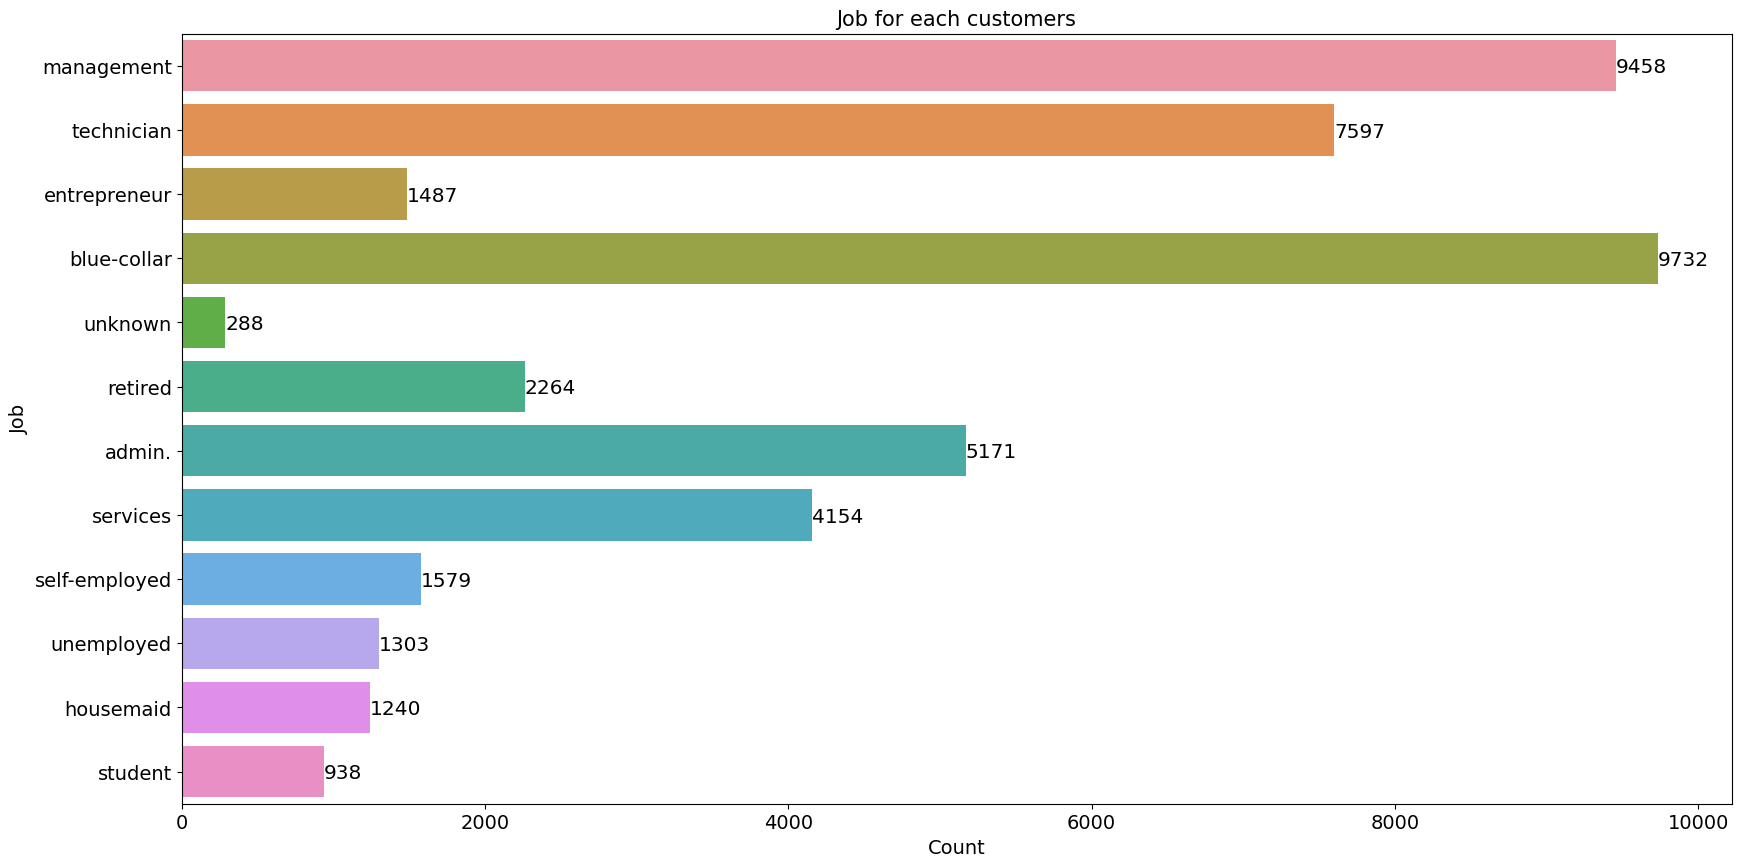

In [4]:
# Job
plt.figure(figsize = (20, 10))
job_sns = sns.countplot(y = bank_dataset_17.job)
job_sns.set_xticklabels(job_sns.get_xticklabels())

for counts in job_sns.patches:
  width = counts.get_width()
  label_x = counts.get_x() + counts.get_width() + 0.05
  label_y = counts.get_y() + counts.get_height() / 1.4
  plt.text(label_x, label_y, s = f"{width:.0f}", ha='left', va='bottom', color = "black", size = 14.5)

plt.xlabel("Count", fontsize = 14)
plt.ylabel("Job", fontsize = 14)
plt.title("Job for each customers", fontsize = 15)

Text(0.5, 1.0, 'Marital for each customers')

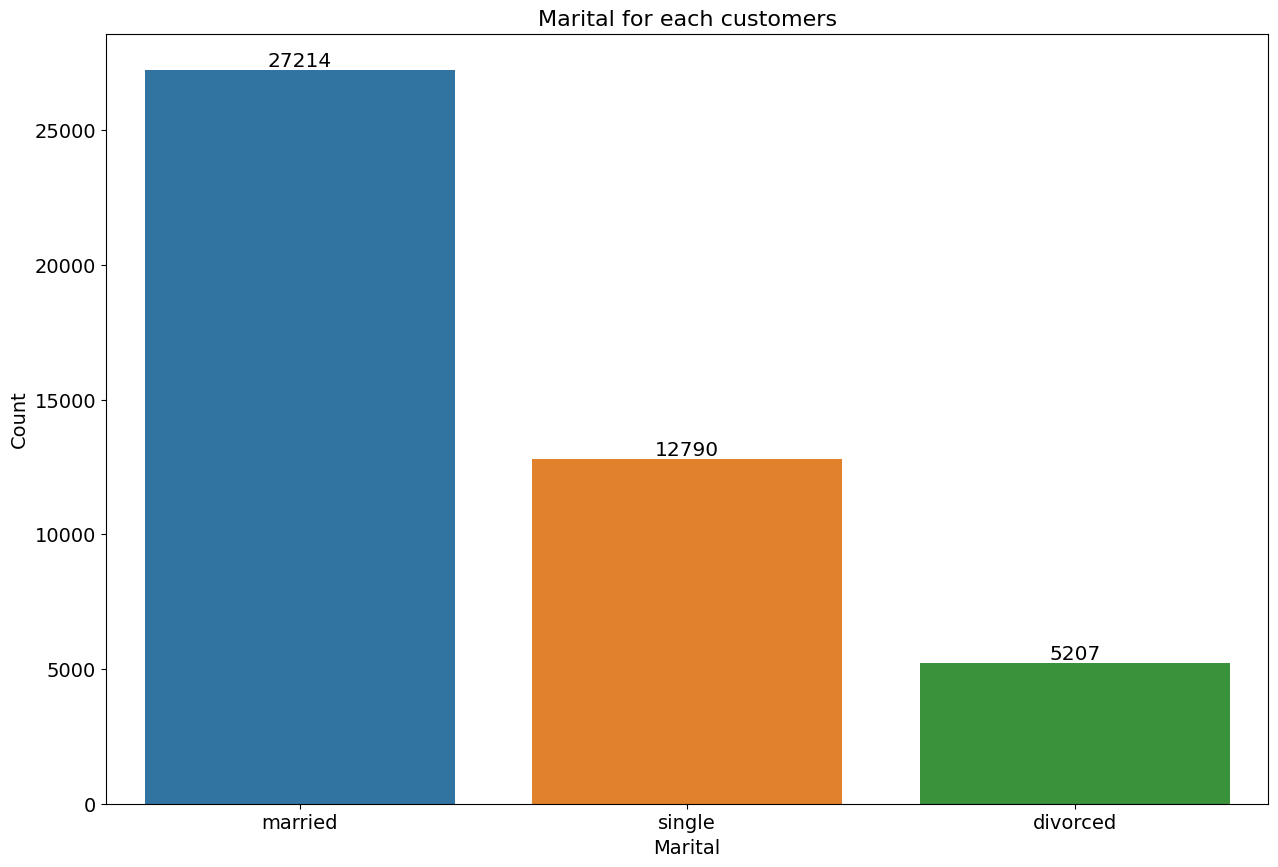

In [5]:
# Marital
plt.figure(figsize = (15, 10))
job_sns = sns.countplot(x = bank_dataset_17.marital)
job_sns.set_xticklabels(job_sns.get_xticklabels())

for counts in job_sns.patches:
  height = counts.get_height()
  label_x = counts.get_x() + counts.get_width() / 2
  label_y = counts.get_y() / height + height
  plt.text(label_x, label_y, s = f"{height:.0f}", ha='center', va='bottom', color = "black", size = 14.5)

plt.xlabel("Marital", fontsize = 14)
plt.ylabel("Count", fontsize = 14)
plt.title("Marital for each customers", fontsize = 16)

Text(0, 0.5, 'Count')

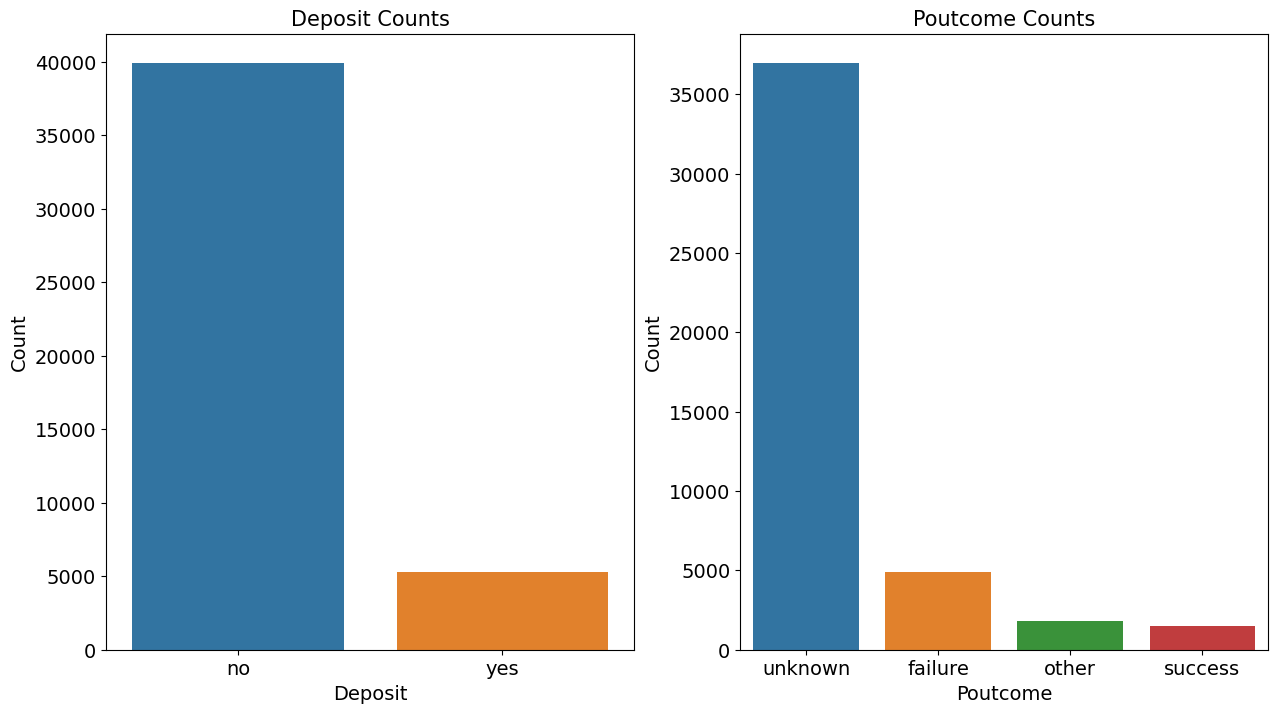

In [6]:
fig, axes = plt.subplots(1, 2, figsize = (15, 8))

# Deposit
ax1 = sns.countplot(x = bank_dataset_17.y, ax = axes[0])
ax1.set_title("Deposit Counts", fontsize = 15)
ax1.set_xlabel("Deposit")
ax1.set_ylabel("Count")

# Poutcome
ax1 = sns.countplot(x = bank_dataset_17.poutcome, ax = axes[1])
ax1.set_title("Poutcome Counts", fontsize = 15)
ax1.set_xlabel("Poutcome")
ax1.set_ylabel("Count")

Text(0, 0.5, 'Count')

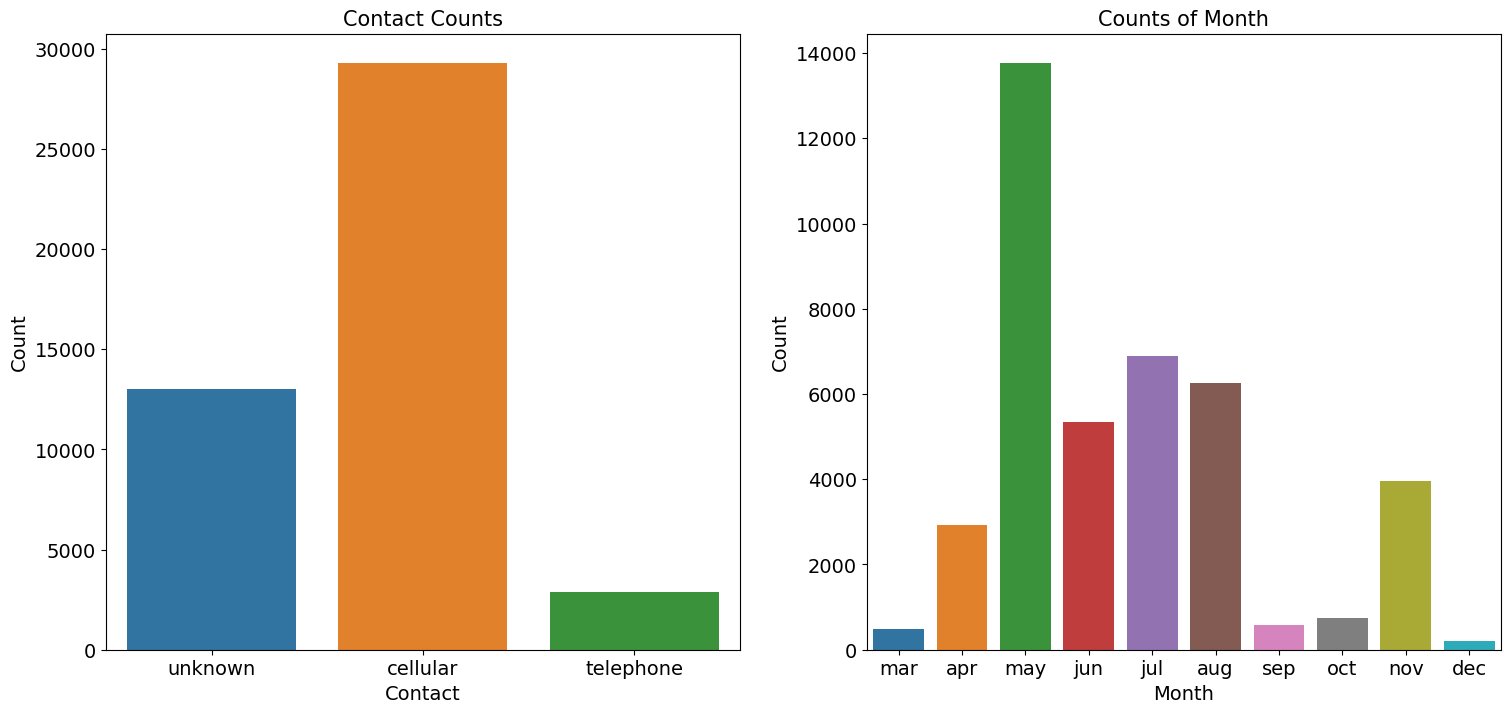

In [7]:
"Contacts, Day of Week and Month"
fig, axes = plt.subplots(1, 2, figsize = (18, 8))

# Contact
ax1 = sns.countplot(x = bank_dataset_17.contact, ax = axes[0])
ax1.set_title("Contact Counts", fontsize = 15)
ax1.set_xlabel("Contact")
ax1.set_ylabel("Count")

# Month
ax2 = sns.countplot(x = bank_dataset_17.month, ax = axes[1], order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_title("Counts of Month", fontsize = 15)
ax2.set_xlabel("Month")
ax2.set_ylabel("Count")

Text(0, 0.5, 'Count')

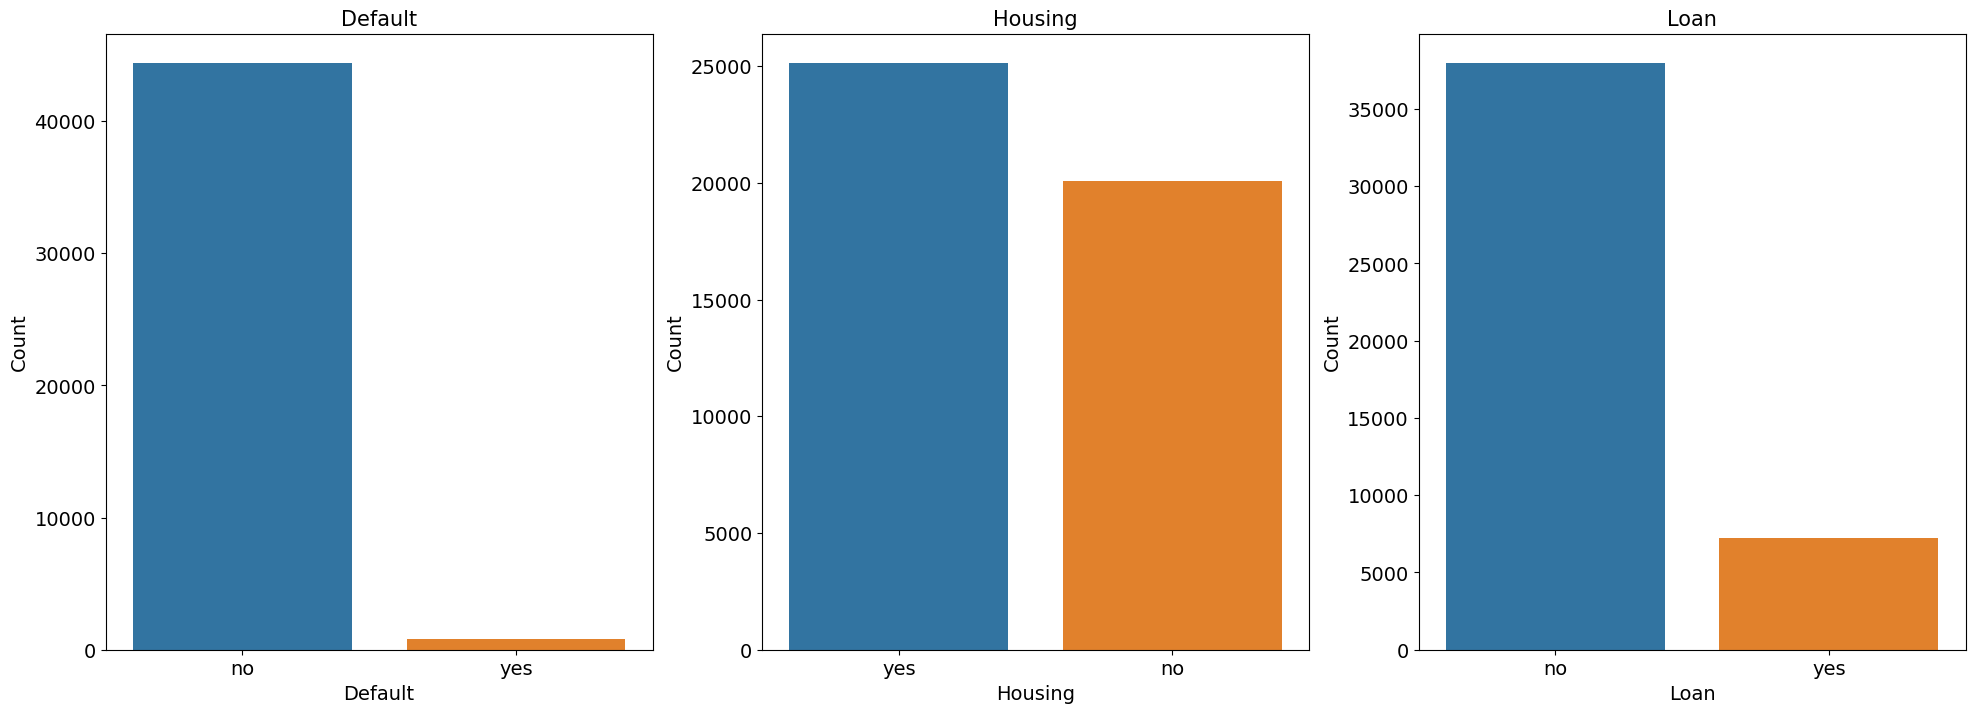

In [8]:
"Default, Housing, Loan"
fig, axes = plt.subplots(1, 3, figsize = (24, 8))

# Default
ax1 = sns.countplot(x = bank_dataset_17.default, ax = axes[0])
ax1.set_title("Default", fontsize = 15)
ax1.set_xlabel("Default")
ax1.set_ylabel("Count")

# Housing
ax2 = sns.countplot(x = bank_dataset_17.housing, ax = axes[1])
ax2.set_title("Housing", fontsize = 15)
ax2.set_xlabel("Housing")
ax2.set_ylabel("Count")

# Loan
ax3 = sns.countplot(x = bank_dataset_17.loan, ax = axes[2])
ax3.set_title("Loan", fontsize = 15)
ax3.set_xlabel("Loan")
ax3.set_ylabel("Count")

# Pre-processing

In [9]:
bank_dataset_process = bank_dataset_17.replace("unknown", np.nan)
bank_dataset_process

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [10]:
bank_dataset_process.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


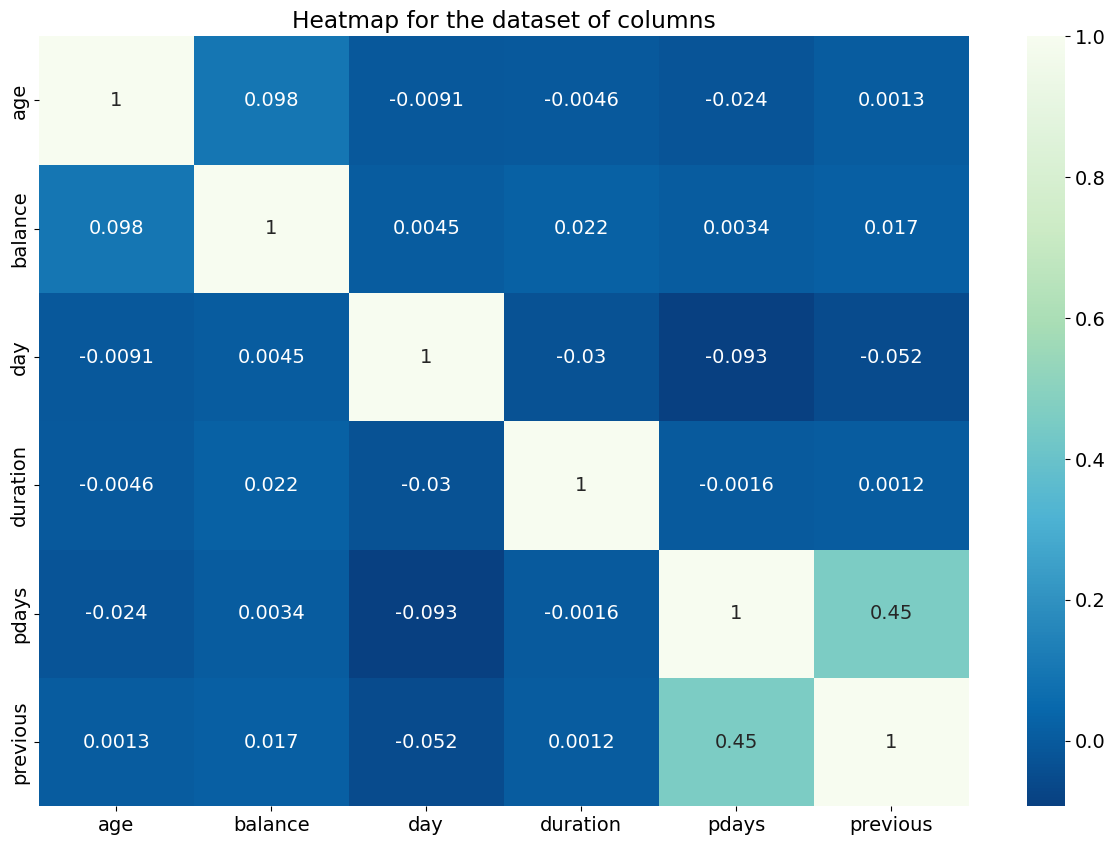

In [11]:
# Features correlation
plt.figure(figsize = (15, 10))
sns.heatmap(bank_dataset_process[["age", "balance", "day", "duration", "pdays", "previous"]].corr(), 
            cmap = "GnBu_r", annot = True)
plt.title("Heatmap for the dataset of columns")
plt.show()

In [12]:
bank_dataset_process.isna().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [13]:
bank_dataset_process.dropna(inplace = True)
bank_dataset_process

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,882,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,-247,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,3444,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,2415,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,0,yes,no,telephone,23,oct,140,1,143,3,failure,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,blue-collar,single,secondary,no,1475,yes,no,cellular,16,nov,1166,3,530,12,other,no
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,yes
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes


In [14]:
# Encode string into incremental value
le = LabelEncoder()
for column_name in bank_dataset_process.columns:
   if bank_dataset_process[column_name].dtype == object:
     bank_dataset_process[column_name] = le.fit_transform(bank_dataset_process[column_name])

bank_dataset_process[[column_name]]

,y
24060,0
24062,1
24064,1
24072,0
24077,1
...,...
45199,0
45201,1
45204,1
45208,1


In [15]:
x = bank_dataset_process.drop(["y"], axis = 1)
x

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
24060,33,0,1,2,0,882,0,0,1,21,10,39,1,151,3,0
24062,42,0,2,1,0,-247,1,1,1,21,10,519,1,166,1,1
24064,33,7,1,1,0,3444,1,0,1,21,10,144,1,91,4,0
24072,36,4,1,2,0,2415,1,0,1,22,10,73,1,86,4,1
24077,36,4,1,2,0,0,1,0,1,23,10,140,1,143,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45199,34,1,2,1,0,1475,1,0,0,16,9,1166,3,530,12,1
45201,53,4,1,2,0,583,0,0,0,17,9,226,1,184,4,2
45204,73,5,1,1,0,2850,0,0,0,17,9,300,1,40,8,0
45208,72,5,1,1,0,5715,0,0,0,17,9,1127,5,184,3,2


In [16]:
y = bank_dataset_process[["y"]]
y

,y
24060,0
24062,1
24064,1
24072,0
24077,1
...,...
45199,0
45201,1
45204,1
45208,1


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5489, 16), (5489, 1), (2353, 16), (2353, 1))

In [18]:
# Applying SMOTE on the training data
sm = SMOTE(random_state = 42)
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)
x_test_smote, y_test_smote = sm.fit_resample(x_test, y_test)
x_train_smote.shape, y_train_smote.shape, x_test_smote.shape, y_test_smote.shape

((8490, 16), (8490, 1), (3622, 16), (3622, 1))

In [19]:
# Applying Random Over Sampler on the training data
over_sampling = RandomOverSampler()
x_train_sampled, y_train_sampled = over_sampling.fit_resample(x_train, y_train)
x_test_sampled, y_test_sampled = over_sampling.fit_resample(x_test, y_test)
x_train_sampled.shape, y_train_sampled.shape, x_test_sampled.shape, y_test_sampled.shape

((8490, 16), (8490, 1), (3622, 16), (3622, 1))

# Training and predicting the dataset for each algorithm

**Machine Learning Algorithms**

In [20]:
# Define a function which evaluates the model with train and test score 
def model_eval(model, x_train, y_train, x_test, y_test, colors):
  from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score, recall_score, precision_score, classification_report

  model.fit(x_train, y_train.values.ravel())

  # Print accuracy, AUC and Recall Score in the train data
  y_prediction_train = model.predict(x_train)
  y_score_train = model.predict_proba(x_train)[:,1]
  print("Overall Train Accuracy:", accuracy_score(y_train, y_prediction_train))
  print("Train AUC Score:", roc_auc_score(y_train, y_score_train))
  print("Overall Train Recall:", recall_score(y_train, y_prediction_train))

  print("-" * 60)
  
  y_prediction = model.predict(x_test)
  y_score = model.predict_proba(x_test)[:,1]

  # Print accuracy, AUC and Recall Score
  print("Overall Test Accuracy:", accuracy_score(y_test, y_prediction))
  print("Test AUC Score:", roc_auc_score(y_test, y_score))
  print("Overall Test Recall:", recall_score(y_test, y_prediction))

  # Classification report for the dataset
  print("-" * 60)
  print('Classification Report of Test:\n', classification_report(y_test, y_prediction))

  cm = confusion_matrix(y_test, y_prediction)
  df_cm = pd.DataFrame(cm, range(2),
                    range(2))

  plt.figure(figsize = (15.5, 7))
  plt.subplot(1, 2, 1)
  cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 14.35},
                        xticklabels = ['no', 'yes'], 
                        yticklabels = ['no', 'yes'], cmap = "Blues")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix", fontsize = 14.5)

  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_score)
  plt.subplot(1, 2, 2)
  plt.plot([0, 1], [0, 1], color="navy", lw = 1.5, linestyle = "--")

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.plot(false_positive_rate, true_positive_rate, linewidth = 2.5, 
          label="ROC curve (area = %0.2f)" % roc_auc_score(y_test, y_score), color = colors)
  plt.title("ROC Curve", fontsize = 14.5)
  plt.xlabel("False Positive Rate - FPR")
  plt.ylabel("True Positive Rate - TPR")
  plt.grid()
  plt.legend()
  plt.show()

In [21]:
x_train_dataset = [x_train, x_train_smote, x_train_sampled]
y_train_dataset = [y_train, y_train_smote, y_train_sampled]
x_test_dataset = [x_test, x_test_smote, x_test_sampled]
y_test_dataset = [y_test, y_test_smote, y_test_sampled]
name = ['Normal Sampling' , 'SMOTE', 'Over Sampling']

Naive Bayes Algorithms

Data is Normal Sampling
------------------------------------------------------------
Overall Train Accuracy: 0.8014210238659136
Train AUC Score: 0.827264911622904
Overall Train Recall: 0.662379421221865
------------------------------------------------------------
Overall Test Accuracy: 0.8053548661283468
Test AUC Score: 0.8314074913250512
Overall Test Recall: 0.6808118081180812
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.90      0.84      0.87      1811
           1       0.56      0.68      0.62       542

    accuracy                           0.81      2353
   macro avg       0.73      0.76      0.74      2353
weighted avg       0.82      0.81      0.81      2353



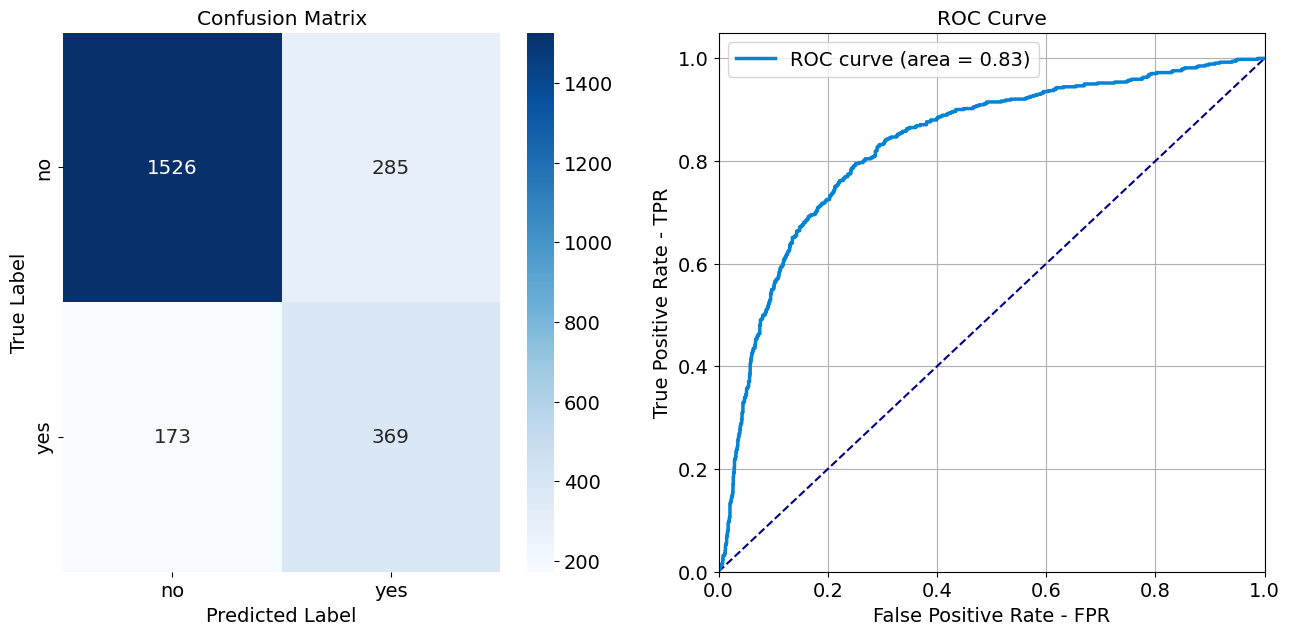

____________________________________________________________
Data is SMOTE
------------------------------------------------------------
Overall Train Accuracy: 0.7825677267373381
Train AUC Score: 0.8519278413875675
Overall Train Recall: 0.893286219081272
------------------------------------------------------------
Overall Test Accuracy: 0.7794036443953617
Test AUC Score: 0.8574598266133003
Overall Test Recall: 0.8873550524572059
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.86      0.67      0.75      1811
           1       0.73      0.89      0.80      1811

    accuracy                           0.78      3622
   macro avg       0.79      0.78      0.78      3622
weighted avg       0.79      0.78      0.78      3622



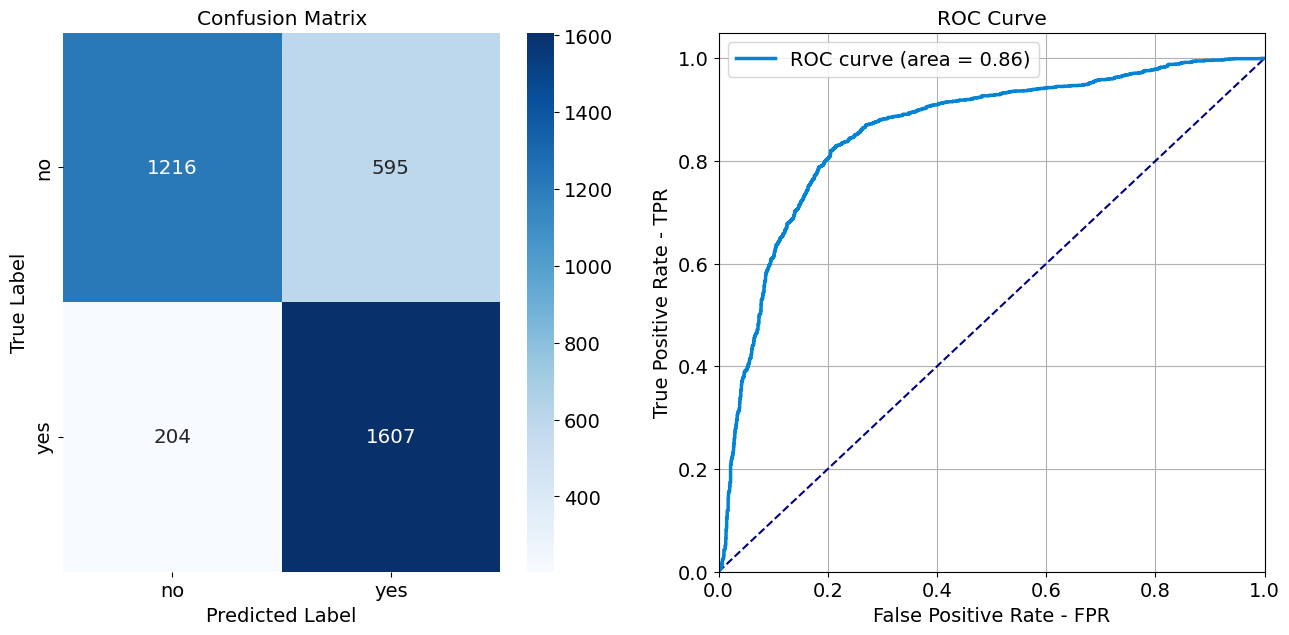

____________________________________________________________
Data is Over Sampling
------------------------------------------------------------
Overall Train Accuracy: 0.7616018845700825
Train AUC Score: 0.8253026286034564
Overall Train Recall: 0.7971731448763251
------------------------------------------------------------
Overall Test Accuracy: 0.7711209276642739
Test AUC Score: 0.8383444811311694
Overall Test Recall: 0.819436775262286
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76      1811
           1       0.75      0.82      0.78      1811

    accuracy                           0.77      3622
   macro avg       0.77      0.77      0.77      3622
weighted avg       0.77      0.77      0.77      3622



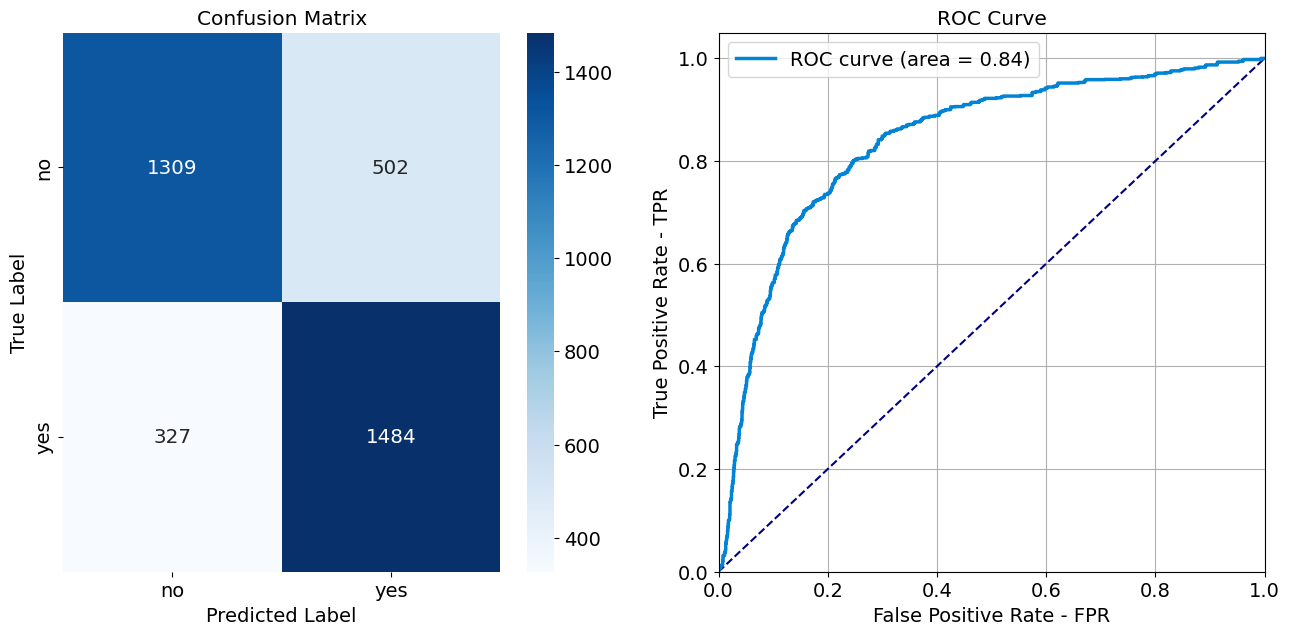

____________________________________________________________


In [22]:
# Result of each Sampling Method
colors_NB = "#0184D6"
for Xtrain, Ytrain, Xtest, Ytest, sampleName in zip(x_train_dataset, y_train_dataset, x_test_dataset, y_test_dataset, name):
  print("Data is", sampleName)
  print("-" * 60)
  model_eval(GaussianNB(), Xtrain, Ytrain, Xtest, Ytest, colors_NB)
  print("_" * 60)

Random Forest Algorithms

Data is Normal Sampling
Overall Train Accuracy: 1.0
Train AUC Score: 1.0
Overall Train Recall: 1.0
------------------------------------------------------------
Overall Test Accuracy: 0.8542286442838929
Test AUC Score: 0.906619245651319
Overall Test Recall: 0.5811808118081181
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      1811
           1       0.73      0.58      0.65       542

    accuracy                           0.85      2353
   macro avg       0.81      0.76      0.78      2353
weighted avg       0.85      0.85      0.85      2353



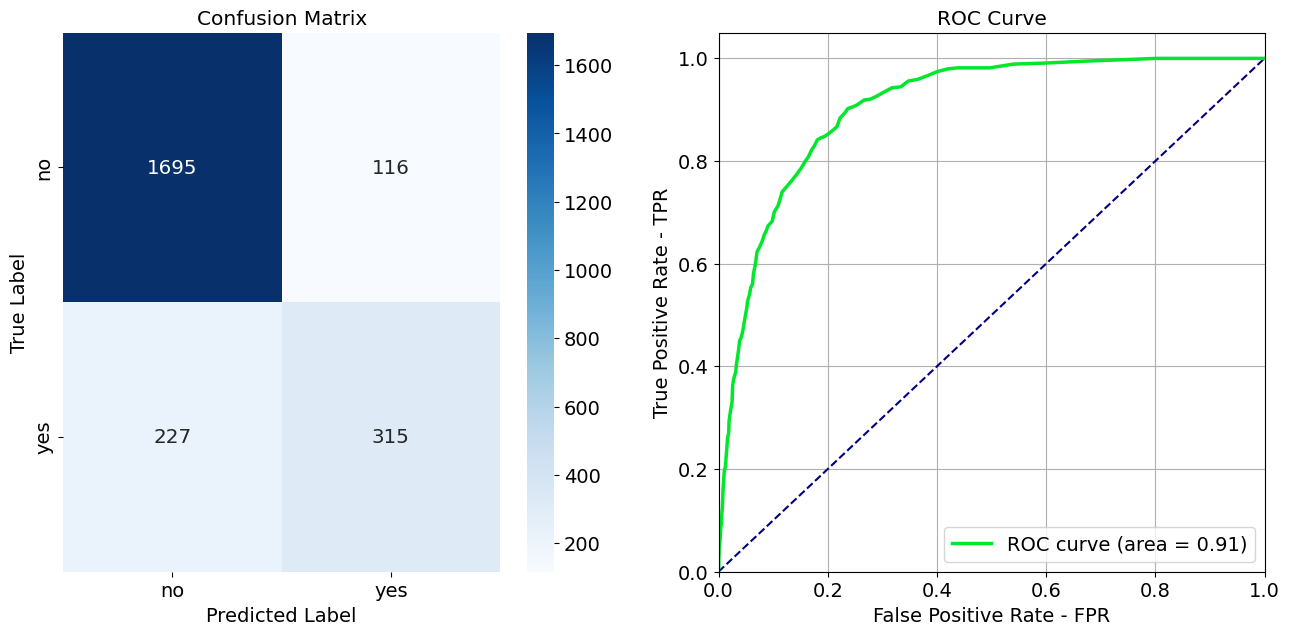

____________________________________________________________
Data is SMOTE
Overall Train Accuracy: 1.0
Train AUC Score: 1.0
Overall Train Recall: 1.0
------------------------------------------------------------
Overall Test Accuracy: 0.8586416344561016
Test AUC Score: 0.935614187914155
Overall Test Recall: 0.8553285477636665
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      1811
           1       0.86      0.86      0.86      1811

    accuracy                           0.86      3622
   macro avg       0.86      0.86      0.86      3622
weighted avg       0.86      0.86      0.86      3622



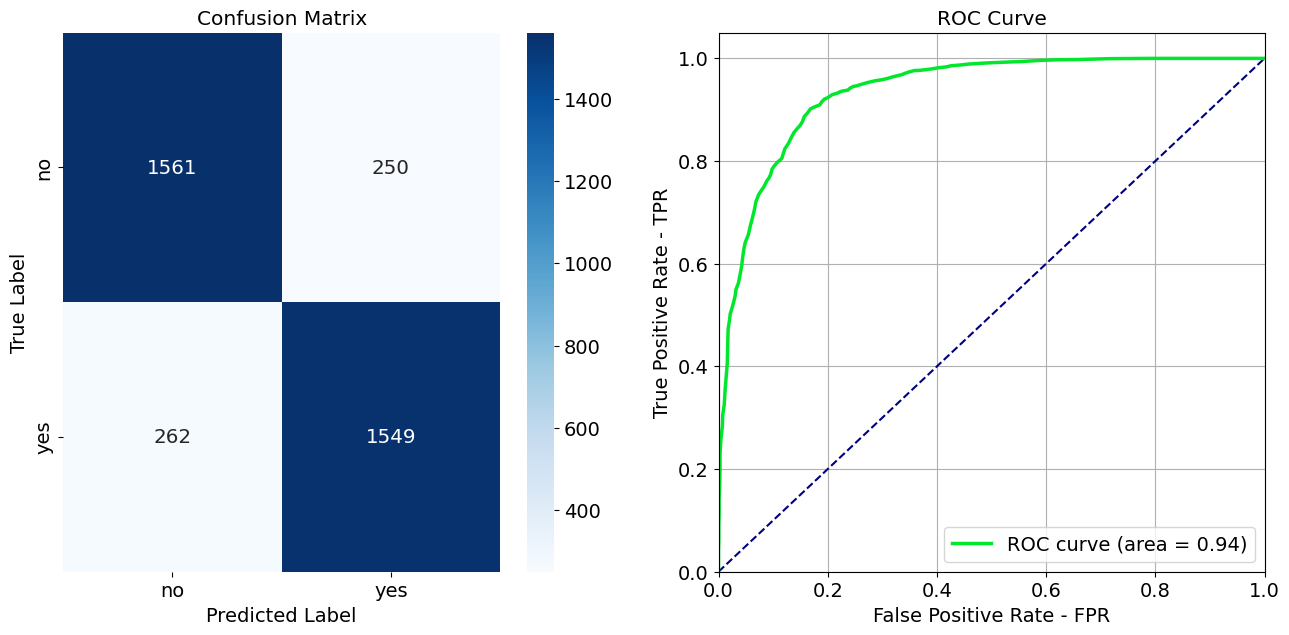

____________________________________________________________
Data is Over Sampling
Overall Train Accuracy: 1.0
Train AUC Score: 1.0
Overall Train Recall: 1.0
------------------------------------------------------------
Overall Test Accuracy: 0.792932081722805
Test AUC Score: 0.9108876944105916
Overall Test Recall: 0.6808393152954169
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.74      0.91      0.81      1811
           1       0.88      0.68      0.77      1811

    accuracy                           0.79      3622
   macro avg       0.81      0.79      0.79      3622
weighted avg       0.81      0.79      0.79      3622



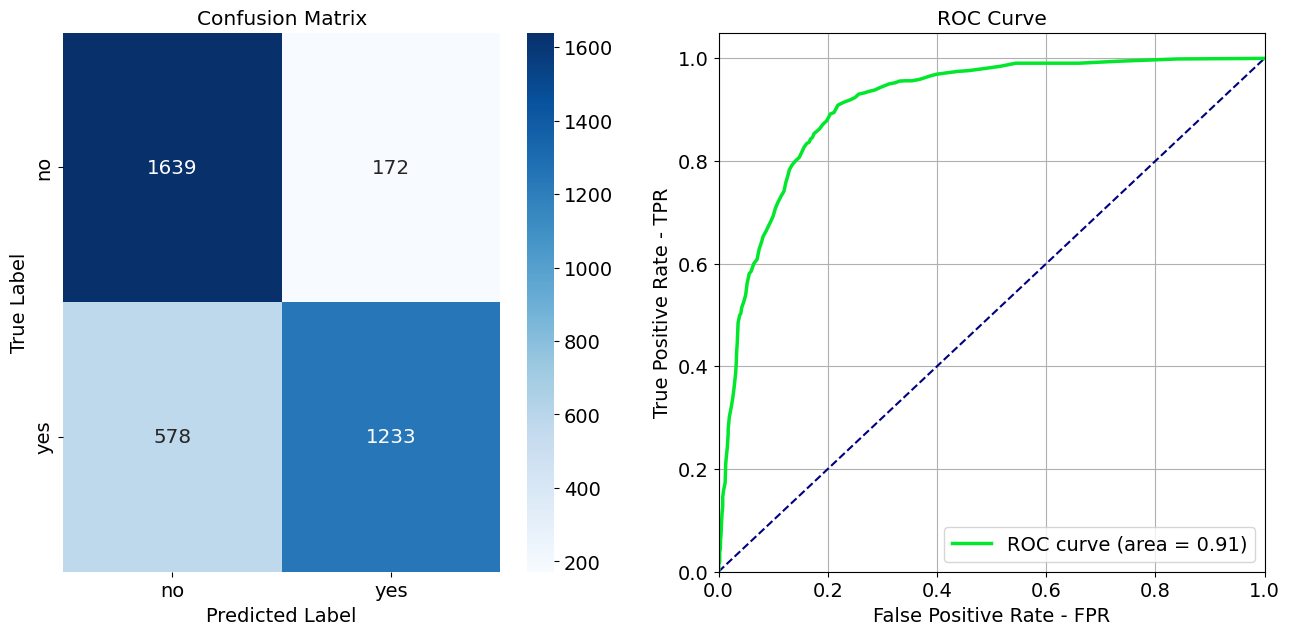

____________________________________________________________


In [23]:
# Result of each Sampling Method
colors_RF = "#01E72C"
for Xtrain, Ytrain, Xtest, Ytest, sampleName in zip(x_train_dataset, y_train_dataset, x_test_dataset, y_test_dataset, name):
  print("Data is", sampleName)
  model_eval(RandomForestClassifier(), Xtrain, Ytrain, Xtest, Ytest, colors_RF)
  print("_" * 60)

Support Vector Machine Algorithms

Data is Normal Sampling
Overall Train Accuracy: 0.7963199125523774
Train AUC Score: 0.8636156969235604
Overall Train Recall: 0.1752411575562701
------------------------------------------------------------
Overall Test Accuracy: 0.7896302592435189
Test AUC Score: 0.8620392802492354
Overall Test Recall: 0.16974169741697417
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.80      0.98      0.88      1811
           1       0.67      0.17      0.27       542

    accuracy                           0.79      2353
   macro avg       0.73      0.57      0.57      2353
weighted avg       0.77      0.79      0.74      2353



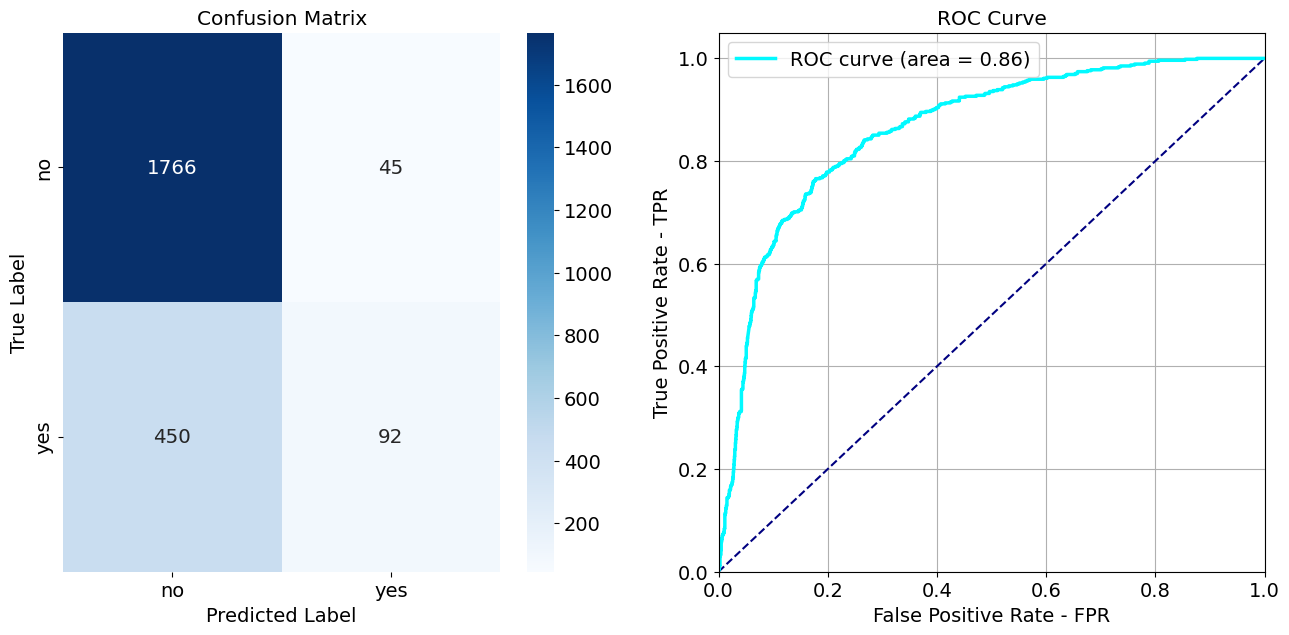

____________________________________________________________
Data is SMOTE
Overall Train Accuracy: 0.8118963486454652
Train AUC Score: 0.8798578803303547
Overall Train Recall: 0.84263839811543
------------------------------------------------------------
Overall Test Accuracy: 0.8130866924351188
Test AUC Score: 0.882470490630148
Overall Test Recall: 0.8464936499171728
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.84      0.78      0.81      1811
           1       0.79      0.85      0.82      1811

    accuracy                           0.81      3622
   macro avg       0.81      0.81      0.81      3622
weighted avg       0.81      0.81      0.81      3622



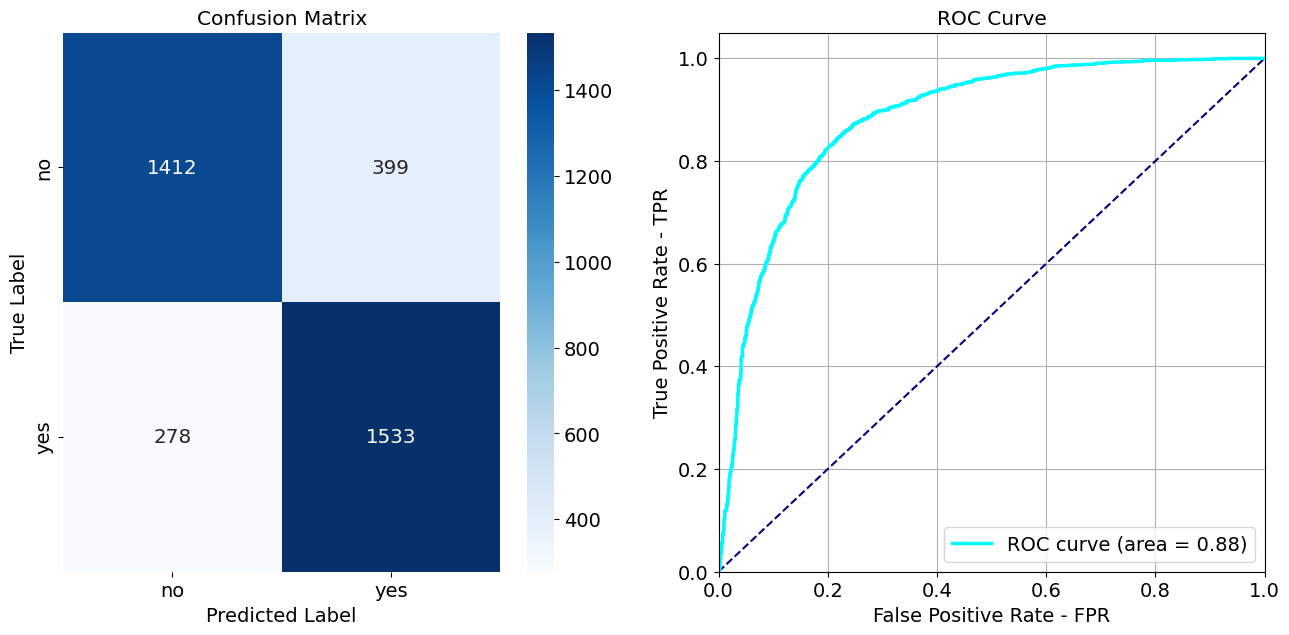

____________________________________________________________
Data is Over Sampling
Overall Train Accuracy: 0.7929328621908127
Train AUC Score: 0.8631779367675684
Overall Train Recall: 0.7861012956419317
------------------------------------------------------------
Overall Test Accuracy: 0.7885146327995582
Test AUC Score: 0.8685863828051228
Overall Test Recall: 0.774157923799006
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.78      0.80      0.79      1811
           1       0.80      0.77      0.79      1811

    accuracy                           0.79      3622
   macro avg       0.79      0.79      0.79      3622
weighted avg       0.79      0.79      0.79      3622



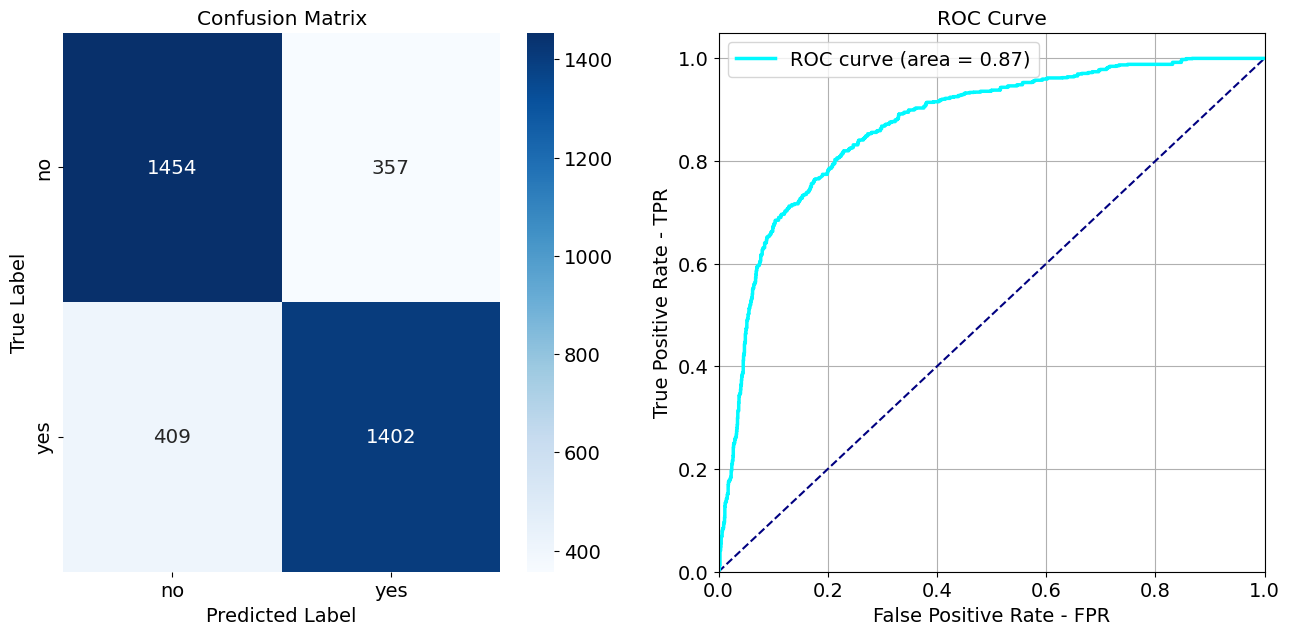

____________________________________________________________


In [24]:
# Result of each Sampling Method
colors_SVC = "#02F9FF"
for Xtrain, Ytrain, Xtest, Ytest, sampleName in zip(x_train_dataset, y_train_dataset, x_test_dataset, y_test_dataset, name):
  print("Data is", sampleName)
  model_eval(SVC(kernel='linear', C = 0.001, probability = True), Xtrain, Ytrain, Xtest, Ytest, colors_SVC)
  print("_" * 60)

In [27]:
from tensorflow.keras import layers, models
from keras.optimizers import Adam
import tensorflow as tf

In [28]:
model = models.Sequential()

#LSTM
model.add(layers.LSTM(32, activation = "relu", input_shape = (16, 1)))
#Dropout
model.add(layers.Dropout(0.25))
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(32, activation = "relu"))
model.add(layers.Dense(2, activation="sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 8,610
Trainable params: 8,610
Non-trainable params: 0
_________________________________________________________________


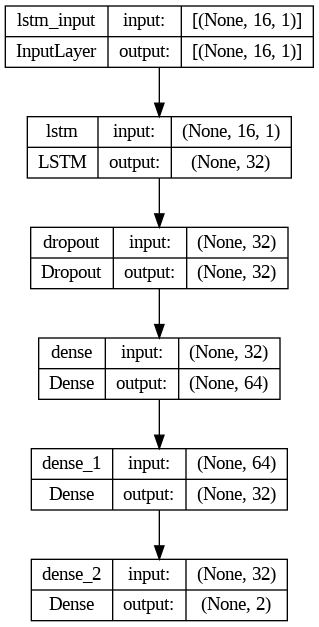

In [29]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [30]:
from keras.callbacks import ModelCheckpoint

check_point = ModelCheckpoint('model.hdf5', monitor="val_accuracy", mode="max",
                              verbose=True, save_best_only=True)

opt = Adam(learning_rate= 0.0001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs = 200, batch_size = 100, verbose = True,
                    validation_data=(x_test, y_test), callbacks = [check_point])

Epoch 1/200
54/55 [============================>.] - ETA: 0s - loss: 1.0356 - accuracy: 0.6470
Epoch 1: val_accuracy improved from -inf to 0.77518, saving model to model.hdf5
55/55 [==============================] - 3s 23ms/step - loss: 1.0285 - accuracy: 0.6477 - val_loss: 0.8581 - val_accuracy: 0.7752
Epoch 2/200
55/55 [==============================] - ETA: 0s - loss: 0.5398 - accuracy: 0.7544
Epoch 2: val_accuracy did not improve from 0.77518
55/55 [==============================] - 1s 14ms/step - loss: 0.5398 - accuracy: 0.7544 - val_loss: 0.5078 - val_accuracy: 0.7748
Epoch 3/200
52/55 [===========================>..] - ETA: 0s - loss: 0.5064 - accuracy: 0.7683
Epoch 3: val_accuracy improved from 0.77518 to 0.77688, saving model to model.hdf5
55/55 [==============================] - 1s 16ms/step - loss: 0.5051 - accuracy: 0.7679 - val_loss: 0.4896 - val_accuracy: 0.7769
Epoch 4/200
51/55 [==========================>...] - ETA: 0s - loss: 0.4909 - accuracy: 0.7720
Epoch 4: val_acc

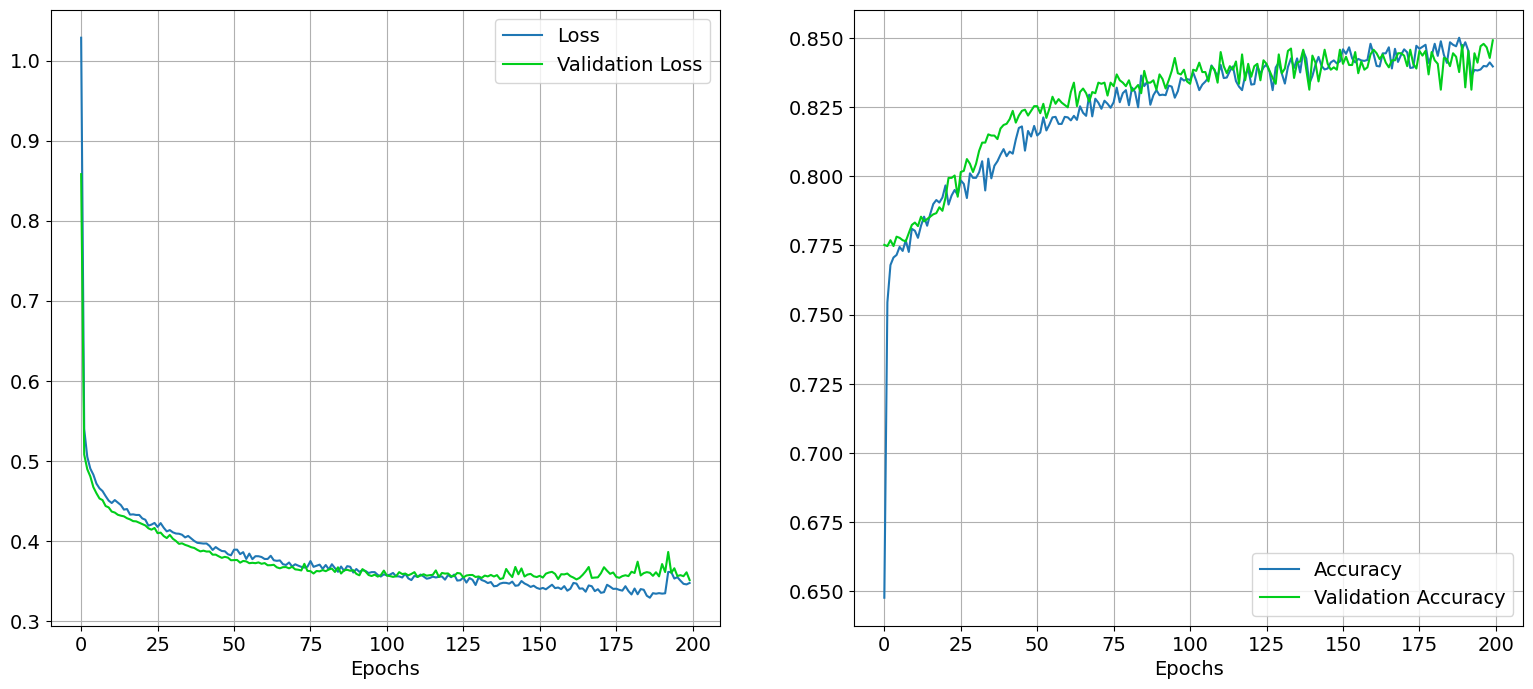

In [31]:
# Loss and Accuracy of LSTM Model
loss = history.history['loss']
validation_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
fig = plt.gcf()
fig.set_size_inches(19, 8)
plt.subplot(1,2,1)
plt.plot(loss)
plt.plot(validation_loss, color = "#01CE1B")
plt.xlabel("Epochs")
plt.legend(['Loss', 'Validation Loss'])
plt.grid()
plt.subplot(1,2,2)
plt.plot(accuracy)
plt.plot(val_accuracy, color = "#01CE1B")
plt.xlabel("Epochs")
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.grid()
plt.savefig('LSTM_Bank_Marketing - Normal Sampling.png')
plt.show()

In [32]:
from keras.models import load_model
saved_model = load_model("model.hdf5")
saved_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 8,610
Trainable params: 8,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
def model_eval_deep_learning(model, x_train, y_train, x_test, y_test, colors):
  from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score, recall_score, precision_score, classification_report

  model.fit(x_train, y_train)
  y_prediction = model.predict(x_test)
  y_prediction = np.argmax(y_prediction, axis = -1)

  _, train_acc = model.evaluate(x_train, y_train, verbose=0)
  _, test_acc = model.evaluate(x_test, y_test, verbose=0)
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

  # Print accuracy, AUC and Recall Score
  print("Overall Test Accuracy:", accuracy_score(y_test, y_prediction))
  print("Test AUC Score:", roc_auc_score(y_test, y_prediction))
  print("Overall Test Recall:", recall_score(y_test, y_prediction))

  # Classification report for the dataset
  print("-" * 60)
  print('Classification Report of Test:\n', classification_report(y_test, y_prediction))

  cm = confusion_matrix(y_test, y_prediction)
  df_cm = pd.DataFrame(cm, range(2),
                    range(2))

  plt.figure(figsize = (15.5, 7))
  plt.subplot(1, 2, 1)
  cm_plot = sns.heatmap(df_cm, annot=True, fmt='n', annot_kws={"size": 14.35},
                        xticklabels = ['no', 'yes'], 
                        yticklabels = ['no', 'yes'], cmap = "Blues")
  plt.xlabel("Predicted Label")
  plt.ylabel("True Label")
  plt.title("Confusion Matrix", fontsize = 14.5)

  false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prediction)
  plt.subplot(1, 2, 2)
  plt.plot([0, 1], [0, 1], color="navy", lw = 1.5, linestyle = "--")

  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.plot(false_positive_rate, true_positive_rate, linewidth = 2.5, 
          label="ROC curve (area = %0.2f)" % roc_auc_score(y_test, y_prediction), color = colors)
  plt.title("ROC Curve", fontsize = 14.5)
  plt.xlabel("False Positive Rate - FPR")
  plt.ylabel("True Positive Rate - TPR")
  plt.grid()
  plt.legend()
  plt.show()

Data is Normal Sampling
74/74 [==============================] - 1s 4ms/step
Train: 0.846, Test: 0.841
Overall Test Accuracy: 0.8406289842753931
Test AUC Score: 0.7090046273184984
Overall Test Recall: 0.46494464944649444
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90      1811
           1       0.75      0.46      0.57       542

    accuracy                           0.84      2353
   macro avg       0.80      0.71      0.74      2353
weighted avg       0.83      0.84      0.83      2353



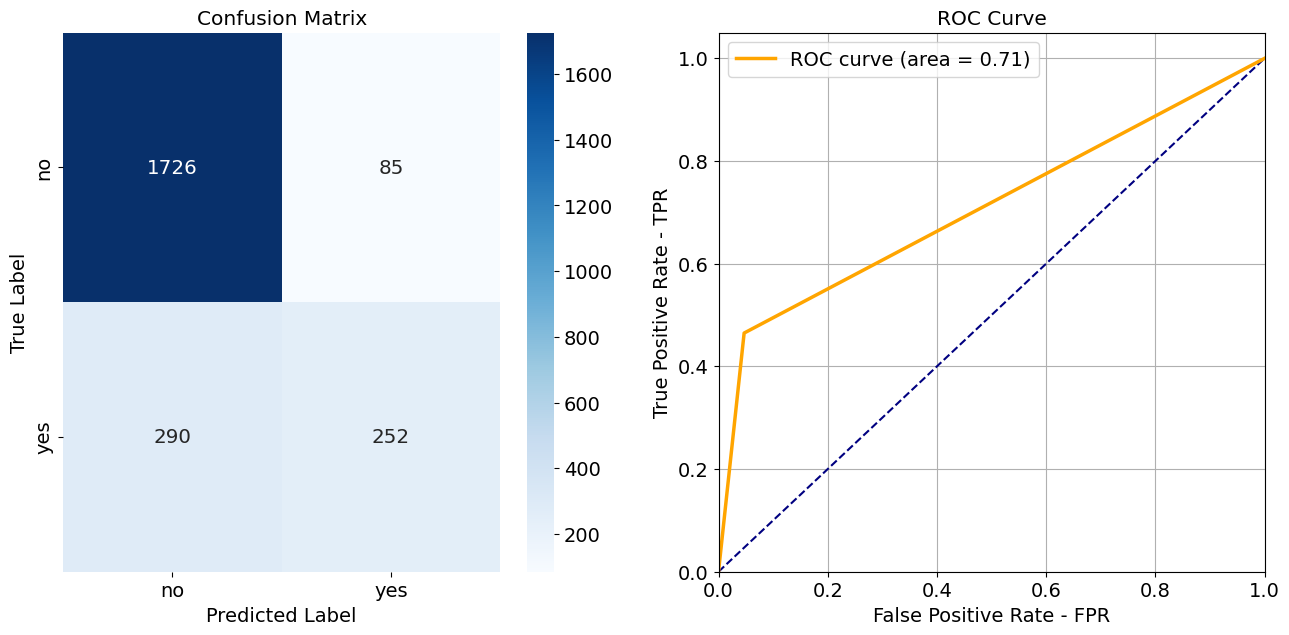

____________________________________________________________
Data is SMOTE
114/114 [==============================] - 0s 4ms/step
Train: 0.818, Test: 0.806
Overall Test Accuracy: 0.8064605190502485
Test AUC Score: 0.8064605190502485
Overall Test Recall: 0.8139149641082275
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81      1811
           1       0.80      0.81      0.81      1811

    accuracy                           0.81      3622
   macro avg       0.81      0.81      0.81      3622
weighted avg       0.81      0.81      0.81      3622



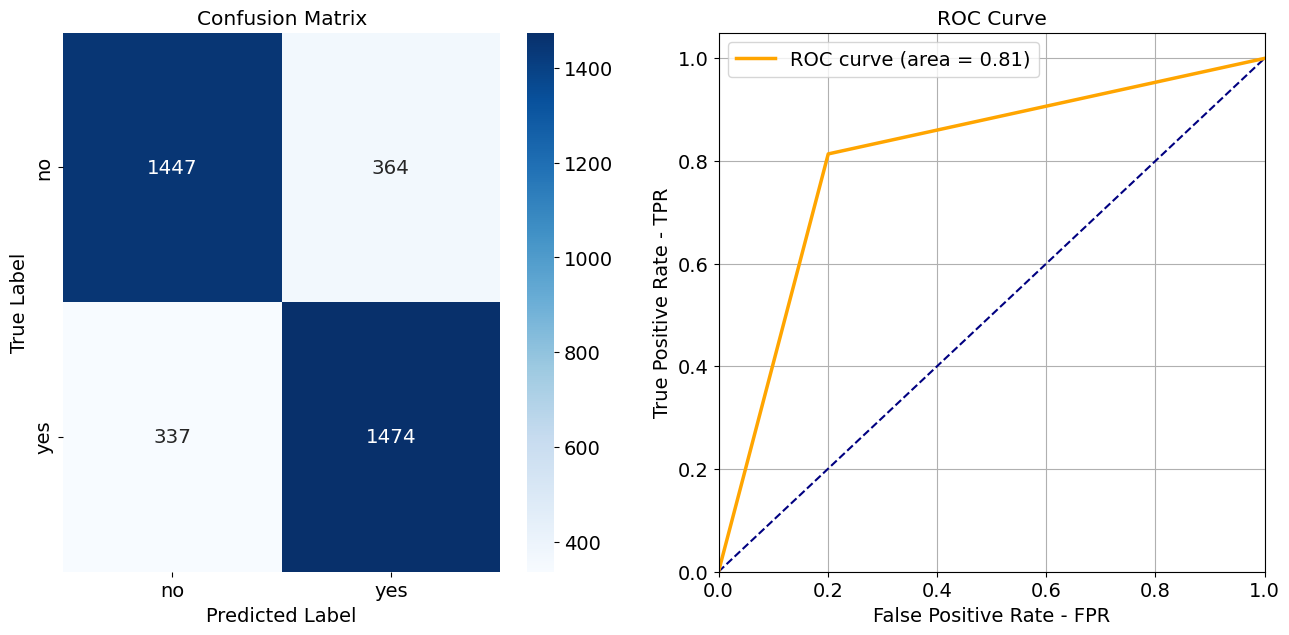

____________________________________________________________
Data is Over Sampling
114/114 [==============================] - 1s 6ms/step
Train: 0.812, Test: 0.805
Overall Test Accuracy: 0.804527885146328
Test AUC Score: 0.804527885146328
Overall Test Recall: 0.8056322473771397
------------------------------------------------------------
Classification Report of Test:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80      1811
           1       0.80      0.81      0.80      1811

    accuracy                           0.80      3622
   macro avg       0.80      0.80      0.80      3622
weighted avg       0.80      0.80      0.80      3622



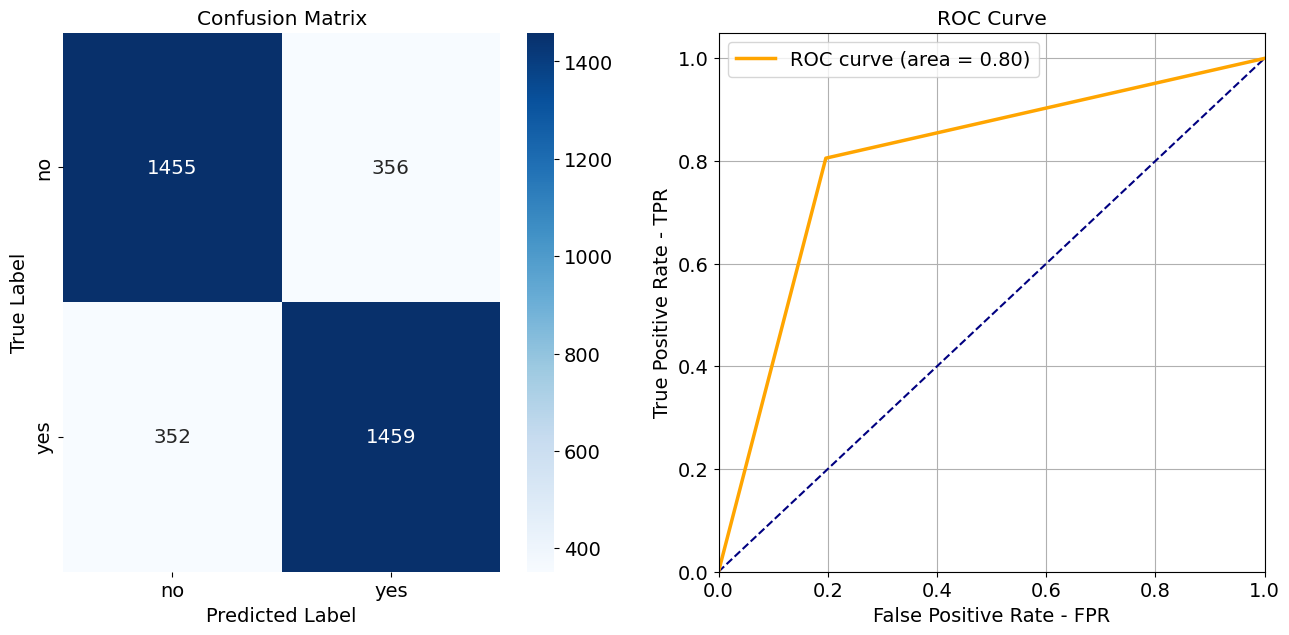

____________________________________________________________


In [34]:
colors = "orange"
for Xtrain, Ytrain, Xtest, Ytest, sampleName in zip(x_train_dataset, y_train_dataset, x_test_dataset, y_test_dataset, name):
  print("Data is", sampleName)
  model_eval_deep_learning(saved_model, Xtrain, Ytrain, Xtest, Ytest, colors)
  print("_" * 60)

**Create table with DataFrame - Including F1-Score, Accuracy, Percision, Recall**

In [ ]:
"Naive Bayes Algorithms"
# Implement and Building for Naive Bayes Algorithms Models
naive_bayes = GaussianNB()
NB_normal_sampled = naive_bayes.fit(x_train, y_train.values.ravel())
NB_SMOTE = naive_bayes.fit(x_train_smote, y_train_smote.values.ravel())
NB_over_sampled = naive_bayes.fit(x_train_sampled, y_train_sampled.values.ravel())
y_predict_NB_normal_sampled = naive_bayes.predict(x_test)
y_predict_NB_SMOTE = naive_bayes.predict(x_test_smote)
y_predict_NB_over_sampled = naive_bayes.predict(x_test_sampled)

"Random Forest Classifiers Algorithms"
# Implement and Building for Random Forest Classifiers Algorithms Models
random_forest = RandomForestClassifier()
RF_normal_sampled = random_forest.fit(x_train, y_train.values.ravel())
RF_SMOTE = random_forest.fit(x_train_smote, y_train_smote.values.ravel())
RF_over_sampled = random_forest.fit(x_train_sampled, y_train_sampled.values.ravel())
y_predict_RF_normal_sampled = random_forest.predict(x_test)
y_predict_RF_SMOTE = random_forest.predict(x_test_smote)
y_predict_RF_over_sampled = random_forest.predict(x_test_sampled)

"Support Vector Machine Algorithms"
# Implement and Building for Support Vector Machine Algorithms Models
support_vector_machine = SVC(kernel='linear', C = 0.001, probability = True)
SVC_normal_sampled = support_vector_machine.fit(x_train, y_train.values.ravel())
SVC_SMOTE = support_vector_machine.fit(x_train_smote, y_train_smote.values.ravel())
SVC_over_sampled = support_vector_machine.fit(x_train_sampled, y_train_sampled.values.ravel())
y_predict_SVC_normal_sampled = support_vector_machine.predict(x_test)
y_predict_SVC_SMOTE = support_vector_machine.predict(x_test_smote)
y_predict_SVC_over_sampled = support_vector_machine.predict(x_test_sampled)

"Deep Learning Model - LSTM"
